# Using Text Formatters

You can provide a function that takes a cells value as input and outputs a string to be displayed on the table.  
Some basic formatters are provided in plottable.formatters.

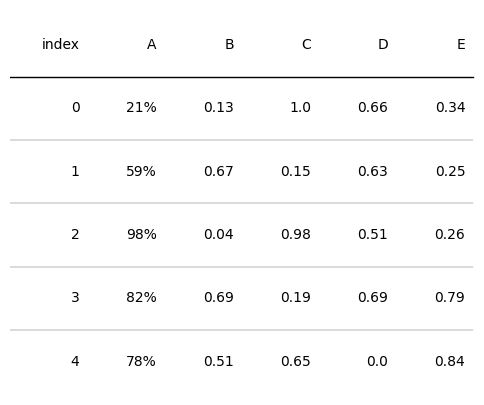

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from plottable import Table

from plottable import ColDef
from plottable.formatters import decimal_to_percent

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
tab = Table(d, column_definitions=[ColDef(name="A", formatter=decimal_to_percent)])

plt.show()

Available formatters are:

```python
def decimal_to_percent(val: float) -> str: ...
    """Formats Numbers to a string, replacing
        0 with "–"
        1 with "✓"
        values < 0.01 with "<1%" and
        values > 0.99 with ">99%"
    """


def tickcross(val: Number | bool) -> str: ...
    """formats a bool or (0, 1) value to a tick "✔" or cross "✖"."""


def signed_integer(val: int) -> str: ...
    """formats an integer to a string that includes the sign, ie. 1 to "+1"."""
```

```{seealso}
The [Women's World Cup Example](../example_notebooks/wwc_example.ipynb) makes use of the decimal_to_percent formatter.
```

## Creating your own formatters

It is very easy to create your own formatter functions.  
Let's take an easy example of rounding of values, for which we will use a lambda function:

```python
lambda x: round(x, 2)
```

You can also create more complex functions like the decimal_to_percent function above.

```python
def my_formatter(cell_content: Any) -> str | Number: ...
```

If you create any formatters that others would enjoy using, please consider sharing them by creating a Pull Request!

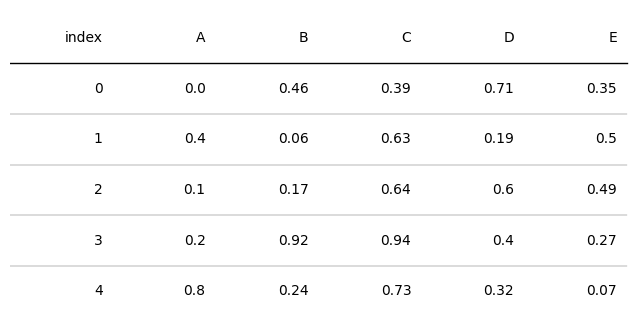

In [2]:
d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(8, 4))
tab = Table(d, column_definitions=[ColDef(name="A", formatter=lambda x: round(x, 1))])

plt.show()

## Builtin String Formatters

To perform common string formatting tasks, the best option is to use builtin formatter syntax.

Formatting digits reference
source: https://www.pythoncheatsheet.org/cheatsheet/string-formatting

    number      format      output      description
    ------      ------      ------      -----------
    3.1415926   {:.2f}      3.14        Format float 2 decimal places
    3.1415926   {:+.2f}     +3.14       Format float 2 decimal places with sign
    -1          {:+.2f}     -1.00       Format float 2 decimal places with sign
    2.71828     {:.0f}      3           Format float with no decimal places
    4           {:0>2d}     04          Pad number with zeros (left padding, width 2)
    4           {:x<4d}     4xxx        Pad number with x’s (right padding, width 4)
    10          {:x<4d}     10xx	    Pad number with x’s (right padding, width 4)
    1000000     {:,}        1,000,000   Number format with comma separator
    0.35        {:.2%}      35.00%      Format percentage
    1000000000  {:.2e}      1.00e+09    Exponent notation
    11          {:11d}      11          Right-aligned (default, width 10)
    11          {:<11d}     11          Left-aligned (width 10)
    11          {:^11d}     11          Center aligned (width 10)

You can providethe format string to a ColumnDefinitions `formatter` argument just as a Callable:

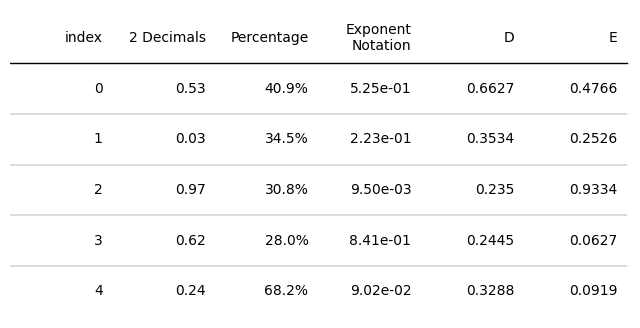

In [3]:
d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(4)
fig, ax = plt.subplots(figsize=(8, 4))
tab = Table(d, column_definitions=[ColDef(name="A", title="2 Decimals", formatter="{:.2f}"), 
                                   ColDef(name="B", title="Percentage", formatter="{:.1%}"),
                                   ColDef(name="C", title="Exponent\nNotation", formatter="{:.2e}")])

plt.show()